[인피닉스 백상엽 팀장님]
# **왜 Python인가?**
- script 언어라 해서 배우기 쉽다.
- 다양한 곳에서 사용할 수 있다.(GUI, Django. 머신러닝 등 다수의 라이브러리)
- 이미 많은 곳에서 사용하고 있다.

# **Python은 근데 정말 쉬운 언어인가?**
- 근본적인 CS 이론에 대해 공부를 해야 이해해야 한다.
- 문법, 라이브러리 사용법만으로는 실무에선 안 된다.
- 객체지향의 특징을 알아야함(오버로딩, 오버라이딩 등)

# **객체지향 프로그래밍 특징**
- 캡슐화(정보의 은닉화, 코드 및 데이터의 번들링)
- 상속(클래스 관련)
- 추상화
- 다형성(오버로딩 - 함수의 이름은 같으나 타입, 매개변수, 다른 동작 등이 다른 경우 | 오버라이딩 - 상위 클래스에서 상속을 받고 해당 메소드의 이름도 그대로 쓰지만 재정의하여여 동작을 편집하는 경우)

# **문법 스타일(이름짓기)**

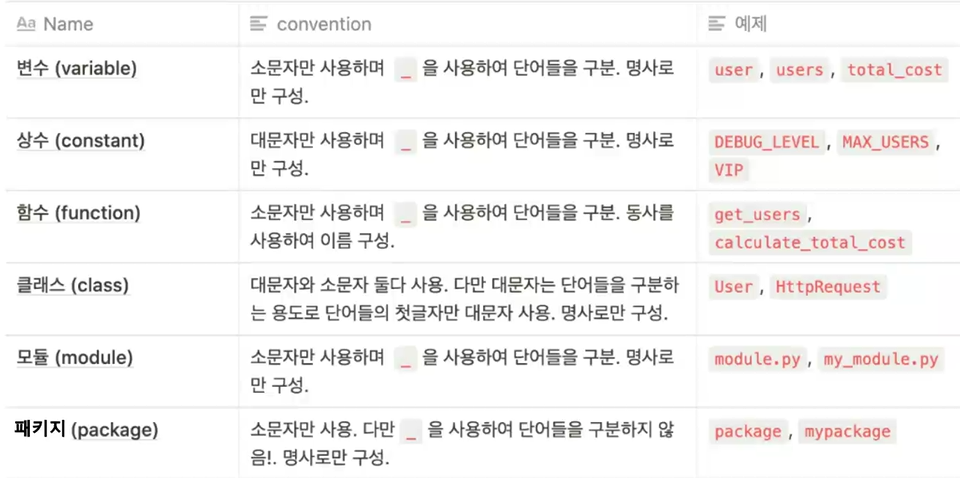

In [1]:
# 특강 실습
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N, D_in, H, D_out = 2,100,50,1
# N : 배치 사이즈(갯수)
# D_in : 뇌세포 몇 개 선언할 거임?
# H : 뇌세포 다발 50개 생성할 거임
# D_out : 몇 개의 결론을 낼 거냐?

In [3]:
x = np.random.randn(N,D_in) # 들어갈 데이터
y = np.random.randn(N,D_out) # 정답지지
print(x.shape)
print(y.shape)

(2, 100)
(2, 1)


In [4]:
print(x, y)
# x를 거치면 y가 나오게끔 / 100개, 50개 넣어서 니들이 알아서 저 1개가 나오도록 학습해라라

[[ 3.86151873e-02  4.71581361e-01 -2.05438604e-01  5.26279753e-01
  -6.66709163e-01 -1.82384524e-01 -1.12823054e-01  1.91786237e-01
  -9.67766710e-01  7.82057942e-01 -7.19560627e-01  1.64642614e+00
  -2.94672395e-01  4.49291570e-01  6.09878595e-01  7.57759379e-01
  -1.18727288e+00  1.61389522e-01 -5.03978404e-01 -2.57987645e-02
  -1.01612016e+00 -1.99290094e+00 -3.76237413e-01  4.01802663e-01
  -1.42203447e+00  6.06704088e-01  7.12060676e-01 -3.16497109e+00
  -1.03854661e+00  7.04119634e-01 -4.72895562e-01 -1.27131010e+00
  -9.24945342e-01 -5.74413377e-01 -1.69571392e+00  2.45117419e+00
  -4.49970079e-01 -2.74982630e-01  1.41630524e+00 -1.40020076e+00
  -9.85764716e-01 -5.42091757e-01  2.65694337e-01 -1.85298964e-01
  -2.05050771e-01  7.85068693e-01 -1.78596704e+00 -8.13260508e-01
   1.49978739e+00 -1.40566545e+00  7.72735082e-01 -1.31460108e-01
  -4.81676933e-01  9.00102658e-01 -1.10019234e+00  1.46625185e+00
   1.57691941e+00  4.58794805e-01  2.98426293e-01  5.43550329e-01
  -7.96419

In [5]:
w1 = np.random.randn(D_in,H) # 가중치(=뉴런). 학습되지 않은 뇌세포
w2 = np.random.randn(H, D_out)

print(w1.shape)
print(w2.shape)

(100, 50)
(50, 1)


In [6]:
# 학습 코드
y_pred_list = list()
loss_list = list()
learning_rate = 1e-6

# 대충 편미분으로 계산시킨다는 내용
for t in range(500):
    h = x.dot(w1) # 행렬곱
    h_relu = np.maximum(h,0)
    y_pred = h_relu.dot(w2)
    y_pred_list.append(y_pred[0][0])

    loss = np.square(y_pred - y).sum()
    loss_list.append(loss)
    print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y) # 편미분
    grad_w2 = h_relu.T.dot(grad_y_pred) # 역행렬
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.T.dot(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 1158.2916049340447
1 1134.065329305323
2 1110.3799878531506
3 1087.2224628000188
4 1064.5799851207241
5 1042.4401243824304
6 1020.7907789070632
7 999.6201662450137
8 978.9168139494379
9 958.6695506408735
10 938.8674973523152
11 919.5000591451382
12 900.6769258709129
13 882.2755415781768
14 864.2753956139311
15 846.6669811239262
16 829.4410383799719
17 812.5885477442283
18 796.1007228509853
19 779.9690039987336
20 764.1850517455381
21 748.7407407008834
22 733.6281535076437
23 718.839575007779
24 704.3674865857726
25 690.2045606839954
26 676.3436554843048
27 662.7778097505272
28 649.500237826531
29 636.5043247848658
30 623.7836217210611
31 611.3318411889175
32 599.1428527722011
33 587.2106787883663
34 575.5294901200947
35 564.0936021705138
36 552.897470938189
37 541.9356892080218
38 531.2029828544313
39 520.6942072531878
40 510.40434379852184
41 500.3284965221444
42 490.4618888109741
43 480.79986022048166
44 471.33786338064937
45 462.0714609916259
46 452.9963229063071
47 444.1082232971

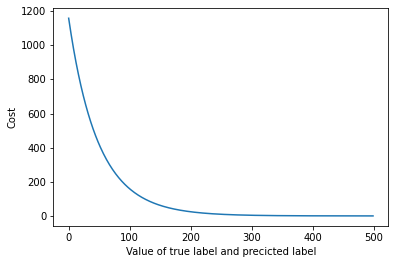

In [7]:
step_list = [i for i in range(len(loss_list))]
plt.plot(step_list,loss_list)
plt.ylabel('Cost')
plt.xlabel('Value of true label and precicted label')
plt.show()